In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:39483")
client

<Client: 'tcp://127.0.0.1:39483' processes=8 threads=40, memory=157.39 GiB>

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import os.path as op
import os
import xrft
import xwavelet
from scipy.interpolate import interp2d, bisplrep, bisplev, griddata
from xgcm.grid import Grid
from xmitgcm import open_mdsdataset
from fastjmd95 import rho as densjmd95
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/tank/chaocean/'
savedir = '/tank/topog/tuchida/Wavelet-spectrum/'
topog = '/tank/topog/tuchida/TWA/'
tdgs = '/tank/tdgs/tuchida/TWA'

In [4]:
grav = 9.81
nensembs = 5
Kh = 20.
K4 = 1e10
Kr = 1e-5
thetaMax = 1e20
rhoConst = 9.998e2
# Cp = 3.994e3
Cp = 3989.244953
# years = np.arange(2008,2013,dtype=int)
ySstart = -15
yNstart = 15
yend = 50
dnf = 2160
nfile = 73

In [5]:
years = np.arange(1967,1968,dtype=int)
ntimes = np.arange(1421280,1576800+dnf,dnf).reshape(len(years),nfile)
dd = 0  
yystart = 0
ntimes[yystart,:]

array([1421280, 1423440, 1425600, 1427760, 1429920, 1432080, 1434240,
       1436400, 1438560, 1440720, 1442880, 1445040, 1447200, 1449360,
       1451520, 1453680, 1455840, 1458000, 1460160, 1462320, 1464480,
       1466640, 1468800, 1470960, 1473120, 1475280, 1477440, 1479600,
       1481760, 1483920, 1486080, 1488240, 1490400, 1492560, 1494720,
       1496880, 1499040, 1501200, 1503360, 1505520, 1507680, 1509840,
       1512000, 1514160, 1516320, 1518480, 1520640, 1522800, 1524960,
       1527120, 1529280, 1531440, 1533600, 1535760, 1537920, 1540080,
       1542240, 1544400, 1546560, 1548720, 1550880, 1553040, 1555200,
       1557360, 1559520, 1561680, 1563840, 1566000, 1568160, 1570320,
       1572480, 1574640, 1576800])

In [6]:
xs = [295,318,
      297.5,316,
      300,315
     ]
ys = [37,43,
      30.5,30,
      24,22
     ]

dCs = 1e-5
Cs = xr.open_zarr(op.join(tdgs,'5Dave/Max_sound-speed/run1967/')).Cs

xo = 50e3
s = xr.DataArray(np.arange(.5,10.5,.5), dims=['scale'], 
                 coords={'scale':np.arange(.5,10.5,.5)}
                )

/tmp/ipykernel_3073/3829648471.py:11: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  Cs = xr.open_zarr(op.join(tdgs,'5Dave/Max_sound-speed/run1967/')).Cs


/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


<xarray.Dataset>
Dimensions:  (XC: 120, YC: 124, XG: 120, YG: 124, Z: 46, Zp1: 47, Zu: 46, Zl: 46, time: 2)
Coordinates: (12/33)
  * XC       (XC) >f4 289.9 290.0 290.1 290.1 290.2 ... 299.9 300.0 300.0 300.1
  * YC       (YC) >f4 31.83 31.92 32.0 32.08 32.17 ... 41.83 41.92 42.0 42.08
  * XG       (XG) >f4 289.8 289.9 290.0 290.1 290.2 ... 299.8 299.9 300.0 300.1
  * YG       (YG) >f4 31.88 31.96 32.04 32.13 32.21 ... 41.88 41.96 42.04 42.13
  * Z        (Z) >f4 -3.047 -9.454 -16.36 ... -5.375e+03 -5.625e+03 -5.875e+03
  * Zp1      (Zp1) >f4 0.0 -6.094 -12.81 -19.91 ... -5.5e+03 -5.75e+03 -6e+03
    ...       ...
    maskInC  (YC, XC) bool dask.array<chunksize=(124, 120), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    maskInW  (YC, XG) bool dask.array<chunksize=(124, 120), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(124, 120), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time   

/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'a

<xarray.Dataset>
Dimensions:  (XC: 1000, YC: 900, XG: 1000, YG: 900, Z: 46, Zp1: 47, Zu: 46, Zl: 46, time: 2)
Coordinates: (12/33)
  * XC       (XC) >f4 262.0 262.1 262.2 262.3 262.3 ... 347.7 347.8 347.9 348.0
  * YC       (YC) >f4 -19.92 -19.83 -19.75 -19.67 ... 54.75 54.83 54.92 55.0
  * XG       (XG) >f4 262.0 262.0 262.1 262.2 262.3 ... 347.7 347.8 347.8 347.9
  * YG       (YG) >f4 -19.96 -19.87 -19.79 -19.71 ... 54.71 54.79 54.88 54.96
  * Z        (Z) >f4 -3.047 -9.454 -16.36 ... -5.375e+03 -5.625e+03 -5.875e+03
  * Zp1      (Zp1) >f4 0.0 -6.094 -12.81 -19.91 ... -5.5e+03 -5.75e+03 -6e+03
    ...       ...
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 1000), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    maskInW  (YC, XG) bool dask.array<chunksize=(900, 1000), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(900, 1000), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time 

/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'a

<xarray.DataArray 'PHIHYD' (time: 2, nmemb: 48, Z: 46, YC: 124, XC: 120)>
dask.array<concatenate, shape=(2, 48, 46, 124, 120), dtype=float64, chunksize=(1, 24, 46, 87, 76), chunktype=numpy.ndarray>
Coordinates: (12/14)
    Depth    (YC, XC) float32 5.414e+03 5.409e+03 ... 4.414e+03 4.458e+03
    PHrefC   (Z) float32 29.89 92.74 160.5 ... 5.273e+04 5.518e+04 5.764e+04
  * XC       (XC) float32 289.9 290.0 290.1 290.1 ... 299.9 300.0 300.0 300.1
  * YC       (YC) float32 31.83 31.92 32.0 32.08 ... 41.83 41.92 42.0 42.08
  * Z        (Z) float32 -3.047 -9.454 -16.36 ... -5.625e+03 -5.875e+03
    drF      (Z) float32 6.094 6.721 7.099 7.971 ... 248.9 249.6 249.9 250.5
    ...       ...
    maskC    (Z, YC, XC) bool True True True True ... False False False False
    maskInC  (YC, XC) bool True True True True True ... True True True True True
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
    rA       (YC, XC) float32 7.531e+07 7.531e+07 ... 6.579e+07 6.579

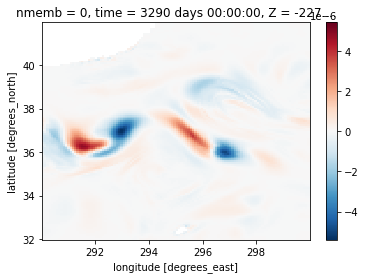

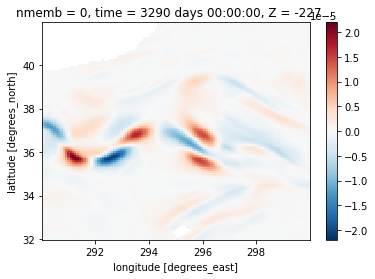

In [48]:
nmembs = np.concatenate((np.arange(24),np.arange(36,60)))
xchunk = 100
ychunk = 100

ng = 2

yy = yystart

for reg in range(len(xs)-5):
    for year in years[yystart:]:
        if year == years[yystart]:
            mtimes = ntimes[yy,:dd+2]
        else:
            mtimes = ntimes[yy]
        
        for itime in mtimes:
            if itime == mtimes[0]:
                dsb = xr.open_zarr(op.join(tdgs,'5Dave/run%4d/Ensemble-mean/%2dmembers/15N-50N_%010d.zarr'
                                           % (year,len(nmembs),itime))
                                  ).isel(time=0
                                        ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                              YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                              XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                              XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                             )
            else:
                dsb = xr.concat([dsb, xr.open_zarr(op.join(tdgs,
                                                        '5Dave/run%4d/Ensemble-mean/%2dmembers/15N-50N_%010d.zarr'
                                                  % (year,len(nmembs),itime))
                                                         ).isel(time=0
                                                 ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                       YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                       XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                                       XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                                      )
                                ], dim='time')
        
        for nmemb in nmembs:
            if nmemb == 0:
                ds = open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run%4d/ocn/' 
                                             % (nmemb,year)), 
                                     grid_dir=op.join(ddir,'grid_chaO/gridMIT_update1/'),
                                     prefix=['diag_ocnTave'], delta_t=2e2,
                                     iters=mtimes, 
                                    ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                          YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                          XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                          XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                         )
                print(ds)
            else:
                if nmemb == 36:
                    print(open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run%4d/ocn/' 
                                                  % (nmemb,year)), 
                                          grid_dir=op.join(ddir,'grid_chaO/gridMIT_update1/'),
                                          prefix=['diag_ocnTave'], delta_t=2e2,
                                          iters=mtimes, 
                                         )
                         )
                ds = xr.concat([ds, open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run%4d/ocn/' 
                                                            % (nmemb,year)), 
                                                    grid_dir=op.join(ddir,'grid_chaO/gridMIT_update1/'),
                                                    prefix=['diag_ocnTave'], delta_t=2e2,
                                                    iters=mtimes, 
                                                   ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                         YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                         XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                                         XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                                        )
                               ], dim='nmemb')
        
        phi0 = xr.open_zarr(op.join(topog,'PHI_5Dave/run%4d/%010d/' % (year,mtimes[0])),
                           ).isel(time=0
                                 ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                       XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                      ).PHIHYD
        phi1 = xr.open_zarr(op.join(topog,'PHI_5Dave/run%4d/%010d/' % (year,mtimes[1])),
                           ).isel(time=0
                                 ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                       XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                      ).PHIHYD
        phi = xr.concat([phi0,phi1], dim='time')
        phi.coords['time'] = ds.time
        phi = xr.concat([phi, ds.PHIHYD.isel(nmemb=slice(24,None))], dim='nmemb')
        phi.coords['nmemb'] = ('nmemb',nmembs)
        print(phi)
                    
        ds.coords['nmemb'] = ('nmemb',nmembs)
        dsb.coords['time'] = ds.time
#         phi.coords['time'] = ds.time
#         phi = phi.drop_vars('nmemb')
#         phi.coords['nmemb'] = ('nmemb',nmembs)

        grid = Grid(ds, periodic=[])
            
        ub = dsb.UVEL.where(ds.maskW!=0.).reset_coords(drop=True)
        vb = dsb.VVEL.where(ds.maskS!=0.).reset_coords(drop=True)
        wb = dsb.WVEL.reset_coords(drop=True)
        up = (ds.UVEL.where(ds.maskW!=0.) - ub).reset_coords(drop=True)
        vp = (ds.VVEL.where(ds.maskS!=0.) - vb).reset_coords(drop=True)
        wp = (ds.WVEL - wb).reset_coords(drop=True)
        phip = (phi - phi.mean('nmemb',skipna=True)
               ).where(ds.maskC!=0.).reset_coords(drop=True)
            
        up_t = grid.interp(up.diff('time'),'X',boundary='extend'
                          ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng)) / (5*86400.)
        vp_t = grid.interp(vp.diff('time'),'Y',boundary='extend'
                          ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng)) / (5*86400.)
        
#         phip_z = grid.interp(-grid.diff(phip,'Z',boundary='extend',to='outer') 
#                              / ds.drC,
#                              'Z',boundary='extend'
#                             ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng))
        phip_y = (grid.diff(grid.interp(phip,'Y',boundary='extend'),
                            'Y',boundary='extend')
                  / grid.interp(ds.dyC,'Y',boundary='extend')
                 ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng))
        phip_x = (grid.diff(grid.interp(phip,'X',boundary='extend'),
                            'X',boundary='extend')
                  / grid.interp(ds.dxC,'X',boundary='extend')
                 ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng))
            
            
        theta = ds.THETA.where(ds.maskC!=0.).reset_coords(drop=True)
        salt = ds.SALT.where(ds.maskC!=0.).reset_coords(drop=True)

        rho_til = grid.interp(rhoConst*(1. - grav*(-grid.cumsum((Cs+dCs)**-2*ds.drF,'Z',
                                                                boundary='extend')
                                                  )),
                              'Z', boundary='extend'
                             )
        pres = rhoConst*grav*(-ds.Z) * 1e-4
        rho = xr.apply_ufunc(densjmd95, salt, theta, 
                             pres, 
                             dask='parallelized', output_dtypes=[float,]
                            )
        b = -grav*(rho - rho_til) / rhoConst
            
        bp = (b - b.mean('nmemb',skipna=True)
             ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng)
                   ).compute()
        wp = grid.interp(wp.reset_coords(drop=True),'Z',boundary='extend'
                        ).where(ds.maskC!=0.).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng))
        vp = grid.interp(vp,'Y',boundary='extend').isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng))
        up = grid.interp(up,'X',boundary='extend').isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng))
        
        (wp*bp).isel(nmemb=0,time=0,Z=0).plot()
        plt.show()
        (up*phip_x + vp*phip_y).isel(nmemb=0,time=0,Z=0).plot()
        plt.show()
            
        xT = grid.cumsum(ds.dxC,'X',boundary='extend'
                        ).isel(YC=slice(ng,-ng),XC=slice(ng,-ng))
        yT = grid.cumsum(ds.dyC,'Y',boundary='extend'
                        ).isel(YC=slice(ng,-ng),XC=slice(ng,-ng))
        xT = (xT - xT.isel(XC=0)).values.flatten()
        yT = (yT - yT.isel(YC=0)).values.flatten()
        dx = ds.dxC.isel(YC=slice(ng,-ng),XG=slice(ng,-ng)).min().values
        dy = ds.dyC.isel(YG=slice(ng,-ng),XC=slice(ng,-ng)).min().values
        N = bp.isel(nmemb=0,time=0,Z=0).shape
        
        ss = xr.DataArray(np.linspace(2*np.maximum(dx,dy),10*xo,30)/xo, dims=['scale'], 
                          coords={'scale':np.linspace(2*dx,10*xo,30)/xo}
                         )
        
        uterp = xr.DataArray(np.ones_like(up), dims=up.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':up.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        vterp = xr.DataArray(np.ones_like(vp), dims=vp.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':vp.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        wterp = xr.DataArray(np.ones_like(vp), dims=vp.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':vp.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        bterp = xr.DataArray(np.ones_like(bp), dims=bp.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':bp.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
#         phip_zterp = xr.DataArray(np.ones_like(up), dims=up.dims,
#                              coords={'time':ds.time,'nmemb':nmembs,'Z':up.Z,
#                                      'YC':np.arange(0,N[-2]*dy,dy),
#                                      'XC':np.arange(0,N[-1]*dx,dx)}
#                             )
        phi_yterp = xr.DataArray(np.ones_like(vp), dims=vp.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':vp.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        phi_xterp = xr.DataArray(np.ones_like(up), dims=vp.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':vp.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        up_terp = xr.DataArray(np.ones_like(up_t), dims=up_t.dims,
                                coords={'nmemb':nmembs,'Z':up.Z,
                                        'YC':np.arange(0,N[-2]*dy,dy),
                                        'XC':np.arange(0,N[-1]*dx,dx)}
                               )
        vp_terp = xr.DataArray(np.ones_like(vp_t), dims=vp_t.dims,
                                coords={'nmemb':nmembs,'Z':up.Z,
                                        'YC':np.arange(0,N[-2]*dy,dy),
                                        'XC':np.arange(0,N[-1]*dx,dx)}
                               )
        
        xxx, yyy = np.mgrid[0:N[-1]*dx:dx, 0:N[-2]*dy:dy]
        
        
        for iz in range(len(wp.Z)):
            for nn in range(len(nmembs)):
                for tt in range(2):
                    uterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (up*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T / (dx*dy)
                    vterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (vp*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T / (dx*dy)
                    wterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (wp*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T / (dx*dy)
                    bterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (bp*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T / (dx*dy)
#                     phip_zterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
#                                                             (phip_z*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
#                                                                           )
#                                                             ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
#                                                             (xxx, yyy) 
#                                                            ).T / (dx*dy)
                    phi_yterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (phip_y*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T / (dx*dy)
                    phi_xterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (phip_x*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T / (dx*dy)
                up_terp.isel(nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                          (up_t*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                          ).isel(nmemb=nn,Z=iz).values.flatten(),
                                                          (xxx, yyy) 
                                                         ).T / (dx*dy)
                vp_terp.isel(nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                          (vp_t*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                          ).isel(nmemb=nn,Z=iz).values.flatten(),
                                                          (xxx, yyy) 
                                                          ).T / (dx*dy)
        
            
        ntheta = 36
#         iso_csU = xwavelet.wvlt_cross_spectrum(
#                     uterb, AdvUterp, s, dim=["YC", "XC"], xo=xo, ntheta=ntheta
#         )
#         iso_csV = xwavelet.wvlt_cross_spectrum(
#                     vterb, AdvVterp, s, dim=["YC", "XC"], xo=xo, ntheta=ntheta
#         )
        iso_wb = xwavelet.wvlt_cross_spectrum(
                    wterp, bterp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
        )
        iso_uphi = xwavelet.wvlt_cross_spectrum(
                    uterp, phi_xterp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
        )
        iso_vphi = xwavelet.wvlt_cross_spectrum(
                    vterp, phi_yterp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
        )
#         iso_wphi = xwavelet.wvlt_cross_spectrum(
#                     wterp, phip_zterp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
#         )
        iso_uu_t = xwavelet.wvlt_cross_spectrum(
                    uterp.mean('time',skipna=True), up_terp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
        )
        iso_vv_t = xwavelet.wvlt_cross_spectrum(
                    vterp.mean('time',skipna=True), vp_terp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
        )
        
        dsave = iso_wb.to_dataset(name='iso_wb')
        dsave['iso_uphi'] = -(iso_uphi+iso_vphi)
        dsave['iso_uu_t'] = (iso_uu_t+iso_vv_t).isel(time=0)
        dsave.encoding = {}
        dsave.to_zarr(op.join(savedir,'ResTrans_region%02d_1967-01-03_08.zarr' % reg),
                      mode='w')
        dsave.close()

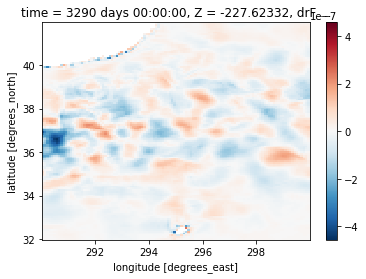

In [37]:
(wp*bp).isel(time=0,Z=0).mean(['nmemb'],skipna=True).plot()

/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/tank/users/tuchida/xmitgcm/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'a

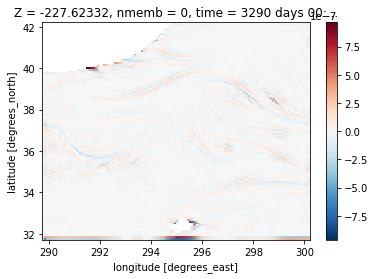

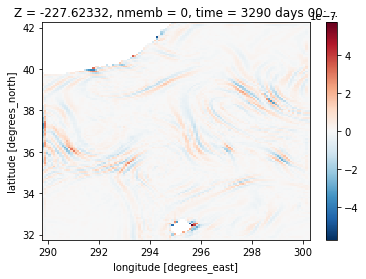

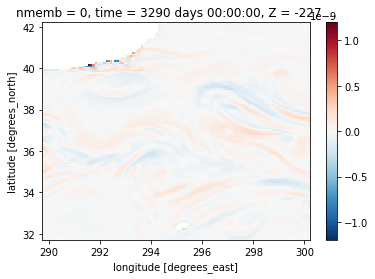

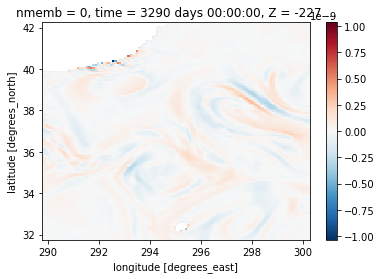

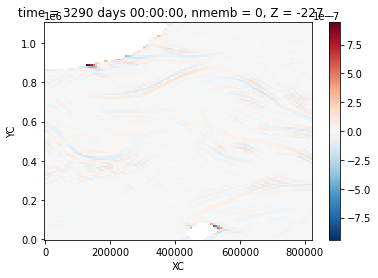

In [25]:
nmembs = np.concatenate((np.arange(24),np.arange(36,60)))
xchunk = 100
ychunk = 100

ng = 3
yy = yystart

for reg in range(len(xs)-5):
    for year in years[yystart:]:
        if year == years[yystart]:
            mtimes = ntimes[yy,:dd+2]
        else:
            mtimes = ntimes[yy]
        
        for itime in mtimes:
            if itime == mtimes[0]:
                dsb = xr.open_zarr(op.join(tdgs,'5Dave/run%4d/Ensemble-mean/%2dmembers/15N-50N_%010d.zarr'
                                           % (year,len(nmembs),itime))
                                  ).isel(time=0
                                        ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                              YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                              XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                              XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                             ).chunk({'Z':1,'Zl':1,'Zu':1,'Zp1':1})
            else:
                dsb = xr.concat([dsb, xr.open_zarr(op.join(tdgs,
                                                        '5Dave/run%4d/Ensemble-mean/%2dmembers/15N-50N_%010d.zarr'
                                                  % (year,len(nmembs),itime))
                                                         ).isel(time=0
                                                 ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                       YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                       XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                                       XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                                      ).chunk({'Z':1,'Zl':1,'Zu':1,'Zp1':1})
                                ], dim='time')
        
        for nmemb in nmembs:
            if nmemb == 0:
                ds = open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run%4d/ocn/' 
                                                 % (nmemb,year)), 
                                         grid_dir=op.join(ddir,'grid_chaO/gridMIT_update1/'),
                                         prefix=['diag_ocnTave'], delta_t=2e2,
                                         iters=mtimes, 
                                        ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                              YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                              XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                              XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                             ).chunk({'Z':1,'Zl':1,'Zu':1,'Zp1':1})
            else:
                ds = xr.concat([ds, open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run%4d/ocn/' 
                                                            % (nmemb,year)), 
                                                    grid_dir=op.join(ddir,'grid_chaO/gridMIT_update1/'),
                                                    prefix=['diag_ocnTave'], delta_t=2e2,
                                                    iters=mtimes, 
                                                   ).sel(YC=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                         YG=slice(ys[reg]-5-ng/12,ys[reg]+5+ng/12),
                                                         XC=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12),
                                                         XG=slice(xs[reg]-5-ng/12,xs[reg]+5+ng/12)
                                                        ).chunk({'Z':1,'Zl':1,'Zu':1,'Zp1':1})
                                   ], dim='nmemb')
                    
        ds.coords['nmemb'] = ('nmemb',nmembs)
        dsb.coords['time'] = ds.time

        grid = Grid(ds, periodic=[])
            
        ub = dsb.UVEL.where(ds.maskW!=0.).reset_coords(drop=True)
        vb = dsb.VVEL.where(ds.maskS!=0.).reset_coords(drop=True)
        up = (ds.UVEL.where(ds.maskW!=0.) - ub).reset_coords(drop=True)
        vp = (ds.VVEL.where(ds.maskS!=0.) - vb).reset_coords(drop=True)
        
        cosFacU = np.cos(ds.YC*2*np.pi/360)
        cosFacV = np.cos(ds.YG*2*np.pi/360)
        
        fZon = (ds.drF*ds.hFacC
            *grid.interp(ds.dyG,'X',boundary='fill')
            *grid.interp(ds.dxG,'Y',boundary='fill')**-1
            *grid.diff(up,'X',boundary='extend')
# #ifdef COSINEMETH_III
#      &   *sqCosFacU(J,bi,bj)
# #endif
# #ifdef ALLOW_OBCS
#      &   *maskInC(i,j,bi,bj)
# #endif
#            *deepFacC(k)        # dyF scaling factor
#            *recip_deepFacC(k)  # recip_dxF scaling factor
        )
        
        fMer = (ds.drF*grid.interp(ds.hFacW,'Y',boundary='fill')
            *grid.interp(ds.dxG,'X',boundary='fill')
            *grid.interp(ds.dyG,'Y',boundary='fill')**-1
            *grid.diff(up,'Y',boundary='fill')
# #if (defined (ISOTROPIC_COS_SCALING) && defined (COSINEMETH_III))
#      &   *sqCosFacV(J,bi,bj)
# #endif
#            *deepFacC(k)        # dxV scaling factor
#            *recip_deepFacC(k)  # recip_dyU scaling factor
        )
        
        del2u = (ds.drF**-1*ds.hFacW**-1
             *ds.rAw**-1
#              *recip_deepFac2C(k)
             *( grid.diff(fZon,'X',boundary='extend')
               +grid.diff(fMer,'Y',boundary='extend')
              ).where(ds.maskW!=0.)
        )

        xViscFluxU = (grid.interp(ds.dyG,'X',boundary='fill')*ds.drF*ds.hFacC
          *(
            -Kh*grid.diff(up,'X',boundary='extend')
            *cosFacU
            +K4*grid.diff(del2u,'X',boundary='extend')
# #ifdef COSINEMETH_III
#             *sqCosFacU(J,bi,bj)
# #else
            *cosFacU
# #endif
           )*grid.interp(ds.dxG,'Y',boundary='fill')**-1
#            *deepFacC(k)        # dyF scaling factor
#            *recip_deepFacC(k)  # recip_dxF scaling factor
        ).reset_coords(drop=True)
        
        yViscFluxU = (grid.interp(ds.dxG,'X',boundary='extend')
                      *ds.drF*grid.interp(ds.hFacW,'Y',boundary='fill')
          *(
            -Kh*grid.diff(up,'Y',boundary='extend')
# #ifdef ISOTROPIC_COS_SCALING
#             *cosFacV(J,bi,bj)
# #endif
            +K4*grid.diff(del2u,'Y',boundary='extend')
# #ifdef ISOTROPIC_COS_SCALING
#    #ifdef COSINEMETH_III
#             *sqCosFacV(J,bi,bj)
#    #else
#             *cosFacV
#    #endif
# #endif
           )*grid.interp(ds.dyG,'Y',boundary='extend')**-1
#            *deepFacC(k)        # dxV scaling factor
#            *recip_deepFacC(k)  # recip_dyU scaling factor
        ).reset_coords(drop=True)
#################################        
        
        fZon = (ds.drF*grid.interp(ds.hFacS,'X',boundary='fill')
            *grid.interp(ds.dyG,'Y',boundary='extend')
            *grid.interp(ds.dxG,'X',boundary='extend')**-1
            *grid.diff(vp,'X',boundary='extend')
# #ifdef COSINEMETH_III
#         *sqCosFacV(J,bi,bj)
# #endif
#        *deepFacC(k)        # dyU scaling factor
#        *recip_deepFacC(k)  # recip_dxV scaling factor
        )
        
        fMer = (ds.drF*ds.hFacC
            *grid.interp(ds.dxC,'X',boundary='extend')
            *grid.interp(ds.dyC,'Y',boundary='extend')**-1
            *grid.diff(vp,'Y',boundary='extend')
# #if (defined (ISOTROPIC_COS_SCALING) && defined (COSINEMETH_III))
#      &   *sqCosFacU(J,bi,bj)
# #endif
# #ifdef ALLOW_OBCS
#      &   *maskInC(i,j,bi,bj)
# #endif
#        *deepFacC(k)        # dxF scaling factor
#        *recip_deepFacC(k)  # recip_dyF scaling factor
        )
        
        del2v = (ds.drF**-1*ds.hFacS**-1
           *ds.rAs**-1
#                  *recip_deepFac2C(k)
           *( grid.diff(fZon,'X',boundary='extend')
             +grid.diff(fMer,'Y',boundary='extend')
            ).where(ds.maskS!=0.)
# #ifdef ALLOW_OBCS
#      &    *maskInS(i,j,bi,bj)
# #endif
        )
        
        xViscFluxV = (grid.interp(ds.dyC,'X',boundary='extend')
                      *ds.drF*grid.interp(ds.hFacS,'X',boundary='extend')
          *(
            -Kh*grid.diff(vp,'X',boundary='extend')
            *cosFacV
            +K4*grid.diff(del2v,'X',boundary='extend')
# #ifdef COSINEMETH_III
#      &       *sqCosFacV(J,bi,bj)
# #else
            *cosFacV
# #endif
           )*grid.interp(ds.dxC,'Y',boundary='extend')**-1
#            *deepFacC(k)        # dyU scaling factor
#            *recip_deepFacC(k)  # recip_dxV scaling factor
        ).reset_coords(drop=True)
        
        yViscFluxV = (grid.interp(ds.dxC,'X',boundary='extend')
                      *ds.drF*ds.hFacC
          *(
            -Kh*grid.diff(vp,'Y',boundary='extend')
# #ifdef ISOTROPIC_COS_SCALING
#             *cosFacU
# #endif
            +K4*grid.diff(del2v,'Y',boundary='extend')
# #ifdef ISOTROPIC_COS_SCALING
#    #ifdef COSINEMETH_III
#             *sqCosFacU(J,bi,bj)
#    #else
#             *cosFacU
#    #endif
# #endif
           )*grid.interp(ds.dyC,'Y',boundary='extend')**-1
#            *deepFacC(k)        # dxF scaling factor
#            *recip_deepFacC(k)  # recip_dyF scaling factor
        ).reset_coords(drop=True)
#################################       
        
        Dup_h = -((grid.diff(xViscFluxU
#                              *grid.interp(ds.dyC,'Y',boundary='extend')
                             ,'X',boundary='extend') 
                  +grid.diff(yViscFluxU
#                              *grid.interp(ds.dxG,'X',boundary='extend')
                             ,'Y',boundary='extend') 
                 ) / ds.rAw/ds.drF)
        Dvp_h = -((grid.diff(xViscFluxV
#                              *grid.interp(ds.dyG,'Y',boundary='extend')
                             ,'X',boundary='extend') 
                  +grid.diff(yViscFluxV
#                              *grid.interp(ds.dxC,'X',boundary='extend')
                             ,'Y',boundary='extend') 
                 ) / ds.rAs/ds.drF)
        Dup_h.isel(nmemb=0,time=0,Z=14).plot()
        plt.show()
        Dvp_h.isel(nmemb=0,time=0,Z=14).plot()
        plt.show()
        Dup_v = (grid.diff(grid.diff(up,'Z',boundary='extend',to='outer')
                                     / ds.drC*ds.rAw,
                           'Z',boundary='extend'
                          ) / ds.drF/ds.rAw
                ) * Kr
        Dvp_v = (grid.diff(grid.diff(vp,'Z',boundary='extend',to='outer')
                                     / ds.drC*ds.rAs,
                           'Z',boundary='extend'
                          ) / ds.drF/ds.rAs
                ) * Kr
        Dup_v.isel(nmemb=0,time=0,Z=14).plot()
        plt.show()
        Dvp_v.isel(nmemb=0,time=0,Z=14).plot()
        plt.show()
        Dup = grid.interp(Dup_h + Dup_v,'X',boundary='extend'
                         ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng)
                               ).compute()
        Dvp = grid.interp(Dvp_h + Dvp_v,'Y',boundary='extend'
                         ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng)
                               ).compute()
        
        up = grid.interp(up,'X',boundary='extend'
                        ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng)
                              ).compute()
        vp = grid.interp(vp,'Y',boundary='extend'
                        ).isel(Z=[14,24],YC=slice(ng,-ng),XC=slice(ng,-ng)
                              ).compute()
#         Dup.isel(time=0,nmemb=0,Z=0).plot(cmap='seismic')
        
        
        xT = grid.cumsum(ds.dxC,'X',boundary='extend'
                        ).isel(YC=slice(ng,-ng),XC=slice(ng,-ng))
        yT = grid.cumsum(ds.dyC,'Y',boundary='extend'
                        ).isel(YC=slice(ng,-ng),XC=slice(ng,-ng))
        xT = (xT - xT.isel(XC=0)).values.flatten()
        yT = (yT - yT.isel(YC=0)).values.flatten()
        dx = ds.dxC.isel(YC=slice(ng,-ng),XG=slice(ng,-ng)).min().values
        dy = ds.dyC.isel(YG=slice(ng,-ng),XC=slice(ng,-ng)).min().values
        N = Dup.isel(nmemb=0,time=0,Z=0).shape
        
        ss = xr.DataArray(np.linspace(2*np.maximum(dx,dy),10*xo,30)/xo, dims=['scale'], 
                          coords={'scale':np.linspace(2*dx,10*xo,30)/xo}
                         )
        
        xxx, yyy = np.mgrid[0:N[-1]*dx:dx, 0:N[-2]*dy:dy]
        
        uterp = xr.DataArray(np.ones_like(up), dims=up.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':up.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        vterp = xr.DataArray(np.ones_like(vp), dims=vp.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':vp.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        Duterp = xr.DataArray(np.ones_like(up), dims=up.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':up.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        Dvterp = xr.DataArray(np.ones_like(vp), dims=vp.dims,
                             coords={'time':ds.time,'nmemb':nmembs,'Z':vp.Z,
                                     'YC':np.arange(0,N[-2]*dy,dy),
                                     'XC':np.arange(0,N[-1]*dx,dx)}
                            )
        
        for iz in range(len(up.Z)):
            for nn in range(len(nmembs)):
                for tt in range(2):
                    uterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (up*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T 
                    vterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (vp*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T 
                    Duterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (Dup*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T 
                    Dvterp.isel(time=tt,nmemb=nn,Z=iz)[:] = griddata((xT, yT), 
                                                            (Dvp*ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                                                          )
                                                            ).isel(time=tt,nmemb=nn,Z=iz).values.flatten(),
                                                            (xxx, yyy) 
                                                           ).T 
                    
        Aterp = griddata((xT, yT), (ds.rA.isel(YC=slice(ng,-ng),XC=slice(ng,-ng)
                                              )).values.flatten(),
                         (xxx, yyy) 
                        ).T
        
        uterp = uterp / Aterp
        vterp = vterp / Aterp
        Duterp = Duterp / Aterp
        Dvterp = Dvterp / Aterp
        Duterp.isel(nmemb=0,time=0,Z=0).plot()
        plt.show()
        
        ntheta = 36
        iso_upDup = xwavelet.wvlt_cross_spectrum(
                    uterp, Duterp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
        )
        iso_vpDvp = xwavelet.wvlt_cross_spectrum(
                    vterp, Dvterp, ss, dim=["YC", "XC"], xo=xo, ntheta=ntheta
        )
        
        
        dsave = iso_upDup.to_dataset(name='iso_Du')
        dsave['iso_Dv'] = iso_vpDvp
        dsave.encoding = {}
        dsave.to_zarr(op.join(savedir,'DisTrans_region%02d_1967-01-03_08.zarr' % reg),
                      mode='w')
        dsave.close()

/tank/users/tuchida/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/tank/users/tuchida/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/tank/users/tuchida/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/tank/users/tuchida/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/tank/users/tuchida/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while g

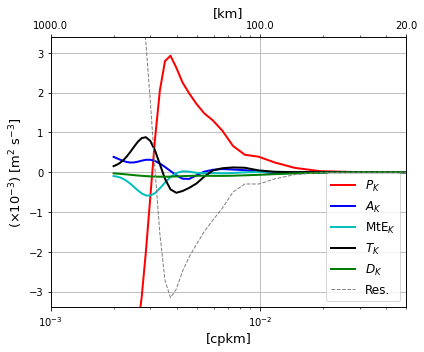

In [49]:
for reg in range(len(xs)-5):
    ds0 = xr.open_dataset(op.join(savedir,'ResTrans_region%02d_1967-01-03_08.zarr' % reg))
    P = (ds0.iso_uphi).mean(['nmemb','angle','time']).compute()
    T = (ds0.iso_uu_t).mean(['nmemb','angle']).compute()
    
    ds1 = xr.open_dataset(op.join(savedir,'Wavelet_AdvKETrans_region%02d_1967-01-03_08.zarr' % reg))
    A = (ds1.App + ds1.Au + ds1.Aw + ds1.MtE).mean(['nmemb','angle','time']).compute()
    MtE = -ds1.MtE.mean(['angle','time']).compute()
    
    ds2 = xr.open_dataset(op.join(savedir,'DisTrans_region%02d_1967-01-03_08.zarr' % reg))
    D = (ds2.iso_Du + ds2.iso_Dv).mean(['nmemb','angle','time']).compute()
    
    res = T - (P + (ds1.App + ds1.Au + ds1.Aw).mean(['nmemb','angle','time']).compute() + D)
            
            
    fig, ax = plt.subplots(figsize=(6,5))
    fig.set_tight_layout(True)
    ax2 = ax.twiny()
    ax.plot((ds0.scale)**-1*1e3, P.isel(Z=0)*1e3,
            'r', lw=2, label=r"$P_K$")
    ax.plot((ds0.scale)**-1*1e3, A.isel(Z=0)*1e3,
            'b', lw=2, label=r"$A_K$")
    ax.plot((ds0.scale)**-1*1e3, MtE.isel(Z=0)*1e3,
            'c', lw=2, label=r"MtE$_K$")
    ax.plot((ds0.scale)**-1*1e3, T.isel(Z=0)*1e3,
            'k', lw=2, label=r"$T_K$")
    ax.plot((ds0.scale)**-1*1e3, D.isel(Z=0)*1e3,
            'g', lw=2, label=r"$D_K$")
    ax.plot((ds0.scale)**-1*1e3, res.isel(Z=0)*1e3, 
            c='grey', ls='--', lw=1, label=r"Res.")
#     ax.plot((iso_csU.scale)**-1*1e3, BC.isel(Z=1)*1e8,
#                     'r:', lw=2)
#     ax.plot((iso_csU.scale)**-1*1e3, MtE.isel(Z=1)*1e8,
#                     'c:', lw=2)
#     ax.plot((iso_csU.scale)**-1*1e3, Kt.isel(Z=1)*1e8,
#                     'k:', lw=2, label=r"(Z=-1137)")
    ax.set_xscale('log')
#             ax.set_yscale('log')
    ax2.set_xscale('log')
#             ax2.set_yscale('log')
    ax.set_xlim([1e-3,5e-2])
    ax2.set_xlim([1e-3,5e-2])
    ax2.set_xticks([1e-3,1e-2,5e-2])
    ax2.set_xticklabels([1e3,1e2,2e1])
    Meta = np.abs(P.isel(Z=0)).max(skipna=True).values*1e3
    ax.set_ylim([-Meta*.7, Meta*.7])
    ax.set_xlabel(r"[cpkm]", fontsize=13)
    ax2.set_xlabel(r"[km]", fontsize=13)
    ax.set_ylabel(r"($\times 10^{-3}$) [m$^2$ s$^{-3}$]", fontsize=13)
    ax.grid(True)
    if reg == 0:
        ax.legend(loc='lower right', fontsize=12)
    plt.savefig(op.join(savedir,'Figs/SpecKEbudget_Region%02d.pdf' % reg))
    plt.show()

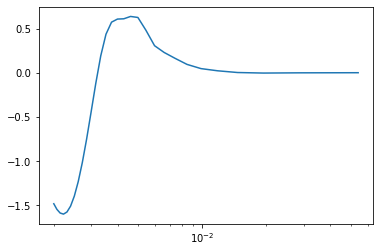

In [41]:
fig, ax = plt.subplots()
ax.plot((ds0.scale)**-1*1e3, (ds0.iso_wb).isel(Z=0).mean(['nmemb','angle','time'])*1e3)
ax.set_xscale('log')

In [51]:
ds.dyC

<xarray.DataArray 'dyC' (YG: 124, XC: 120)>
dask.array<getitem, shape=(124, 120), dtype=>f4, chunksize=(124, 120), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 289.9 290.0 290.1 290.1 290.2 ... 299.9 300.0 300.0 300.1
  * YG       (YG) >f4 31.88 31.96 32.04 32.13 32.21 ... 41.88 41.96 42.04 42.13
    dxG      (YG, XC) >f4 dask.array<chunksize=(124, 120), meta=np.ndarray>
    dyC      (YG, XC) >f4 dask.array<chunksize=(124, 120), meta=np.ndarray>
    rAs      (YG, XC) >f4 dask.array<chunksize=(124, 120), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(124, 120), meta=np.ndarray>
Attributes:
    standard_name:  cell_y_size_at_v_location
    long_name:      cell y size
    units:          m
    coordinate:     YG XC